In [1]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb

import EquationsOfMotion as EOM

%matplotlib inline

importing Jupyter notebook from EquationsOfMotion.ipynb


In [2]:
showFields = True #Display vector potential and fields

In [3]:
d = 0.6 #Diameter of background plasma
dt = 1e-4 #Time step
t0 = 0 #Initial time
N = 1000 #Number of time steps

In [4]:
x0 = 0 #0
y0 = 0 #0
p0x = 1e-3 #1e-3
p0y = 1e-3 #0.1

In [5]:
def qHalfStep(xn,yn,pxn,pyn,dt): #Take half step in q
    x = xn + (dt/2)*pxn
    y = yn + (dt/2)*pxn
    return x,y

def pFullStep(xn,yn,pxn,pyn,dt,t): #Update p based on half step in 1
    px = pxn + dt*EOM.pxDot(xn,yn,t)
    py = pyn + dt*EOM.pyDot(xn,yn,t)
    return px,py

def qFullStep(xn,yn,pxn,pyn,dt): #Correct q based on p full step. This function is identical to qHalfStep, but separate for clarity
    x = xn + (dt/2)*pxn
    y = yn + (dt/2)*pyn
    return x,y
    
def step(xn,yn,pxn,pyn,dt,t): #Complete on cycle of the integrator
    x,y = qHalfStep(xn,yn,pxn,pyn,dt) #Take half step in position 
    px,py = pFullStep(x,y,pxn,pyn,dt,t) #Take full step in momentum
    x,y = qFullStep(x,y,px,py,dt) #Correct position
    t += dt #Update time
    return x,y,px,py,t

def checkSignChange(i,t,dt):
    if (EOM.f(t) < 0) and (EOM.f(t-dt) > 0):
        return 1
    if (EOM.f(t) > 0) and (EOM.f(t-dt) < 0):
        return 2
    else:
        return False

In [6]:
def integrateHamiltonian(x0,y0,p0x,p0y,t0,dt,N):
    minusArray = [] #Store the indices where J2 changes from J2 > 0 to J2 < 0
    plusArray = [] #Store the indices where J2 changes from J2 < 0 to J2 > 0
    t = t0
    xarr,yarr,pxarr,pyarr,B = np.zeros([N+1]),np.zeros([N+1]),np.zeros([N+1]),np.zeros([N+1]),np.zeros([N+1])
    xarr[0],yarr[0],pxarr[0],pyarr[0] = x0,y0,p0x,p0y
    B[0] = EOM.computeNormB(x0,y0,t)
    for i in np.linspace(1,N,N+1,dtype='int'):
        xarr[i],yarr[i],pxarr[i],pyarr[i],t = step(xarr[i-1],yarr[i-1],pxarr[i-1],pyarr[i-1],dt,t)
        B[i] = EOM.computeNormB(xarr[i],yarr[i],t)
        temp = checkSignChange(i,t,dt)
        if temp == 1: 
            minusArray.append(i)
        elif temp == 2:
            plusArray.append(i)
        else:
            continue
    return xarr,yarr,pxarr,pyarr,B,minusArray,plusArray

In [7]:
def plotTrajectories(xarr,yarr,pxarr,pyarr,B,minusArray,plusArray,J,a=EOM.a):
    size = 5
    
    plt.figure(1,figsize=(12,10))
    plt.scatter(xarr[0],pxarr[0],c='r',marker='*',s=15*size,label='Initial Position')
    #plt.scatter(xarr[1:],pxarr[1:],c='b',s=size)
    plt.scatter(xarr[1:],pxarr[1:],c=B[1:],s=size)
    plt.scatter(xarr[minusArray],pxarr[minusArray],s=15*size,c='r',marker='|',label='J2 < 0')
    plt.scatter(xarr[plusArray],pxarr[plusArray],s=15*size,c='r',marker='_',label='J2 > 0')
    plt.xlabel('x')
    plt.ylabel('Px')
    plt.title(f'Px versus x (x phase space), J = {round(J,2)}')
    plt.grid()
    cbar = plt.colorbar()
    cbar.set_label('|B|',rotation=360)
    plt.legend()
    
    plt.figure(2,figsize=(12,10))
    plt.scatter(yarr[0],pyarr[0],c='r',marker='*',s=15*size,label='Initial Position')
    #plt.scatter(yarr[1:],pyarr[1:],c='b',s=size)
    plt.scatter(yarr[1:],pyarr[1:],c=B[1:],s=size)
    plt.scatter(yarr[minusArray],pyarr[minusArray],s=15*size,c='r',marker='|',label='J2 < 0')
    plt.scatter(yarr[plusArray],pyarr[plusArray],s=15*size,c='r',marker='_',label='J2 > 0')
    plt.xlabel('y')
    plt.ylabel('Py')
    plt.title(f'Py versus y (y phase space), J = {round(J,2)}')
    plt.grid()
    cbar = plt.colorbar()
    cbar.set_label('|B|',rotation=360)
    plt.legend()
    
    plt.figure(3,figsize=(12,10))
    plt.scatter(xarr[0],yarr[0],c='r',marker='*',s=15*size,label='Initial Position')
    #plt.scatter(xarr[1:],yarr[1:],c='b',s=size)
    plt.scatter(xarr[1:],yarr[1:],c=B[1:],s=size)
    plt.scatter(xarr[minusArray],yarr[minusArray],s=15*size,c='r',marker='|',label='J2 < 0')
    plt.scatter(xarr[plusArray],yarr[plusArray],s=15*size,c='r',marker='_',label='J2 > 0')
    plt.scatter(-a,0,marker='+',c='b',s=50)
    plt.scatter(a,0,marker='+',c='b',s=50)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Real Space Particle Trajectory, J = {round(J,2)}')
    plt.grid()
    cbar = plt.colorbar()
    cbar.set_label('|B|',rotation=360)
    plt.legend()
    
    plt.figure(4,figsize=(12,10))
    plt.scatter(pxarr[0],pyarr[0],c='r',marker='*',s=15*size,label='Initial Position')
    #plt.scatter(pxarr[1:],pyarr[1:],c='b',s=size)
    plt.scatter(pxarr[1:],pyarr[1:],c=B[1:],s=size)
    plt.xlabel('Px')
    plt.ylabel('Py')
    plt.title(f'Momentum Space Particle Trajectory, J = {round(J,2)}')
    plt.grid()
    cbar = plt.colorbar()
    cbar.set_label('|B|',rotation=360)
    plt.legend()

<string>:4: RuntimeWarning: divide by zero encountered in log
<string>:7: RuntimeWarning: divide by zero encountered in double_scalars
<string>:7: RuntimeWarning: invalid value encountered in double_scalars
<string>:10: RuntimeWarning: invalid value encountered in double_scalars
<string>:36: RuntimeWarning: invalid value encountered in true_divide


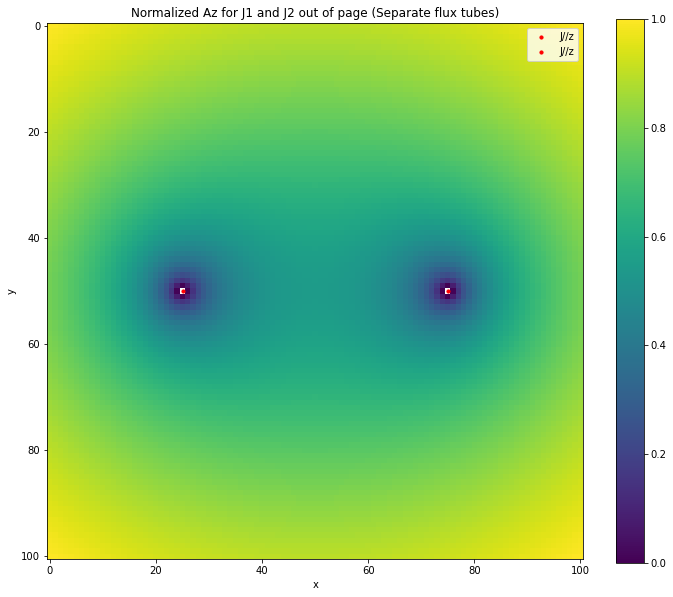

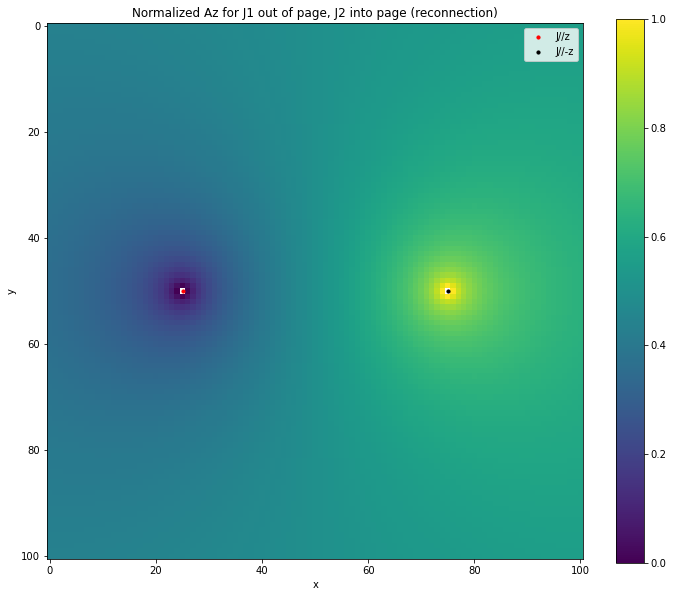

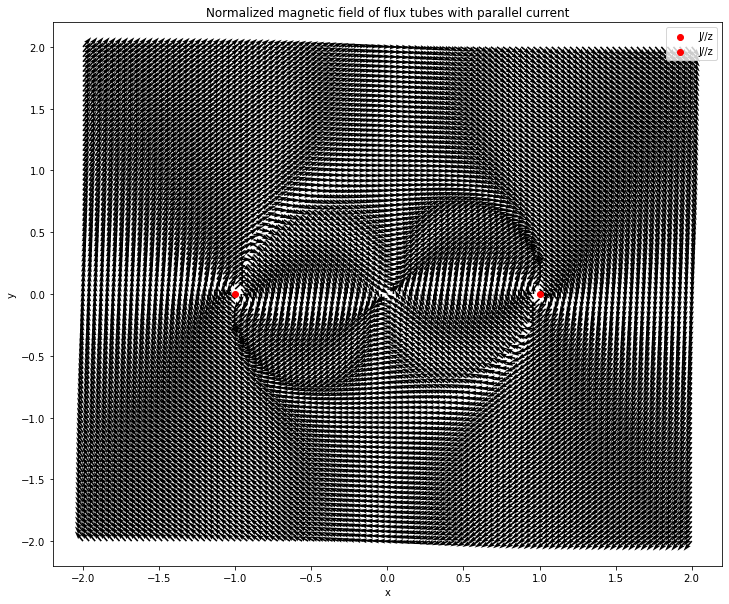

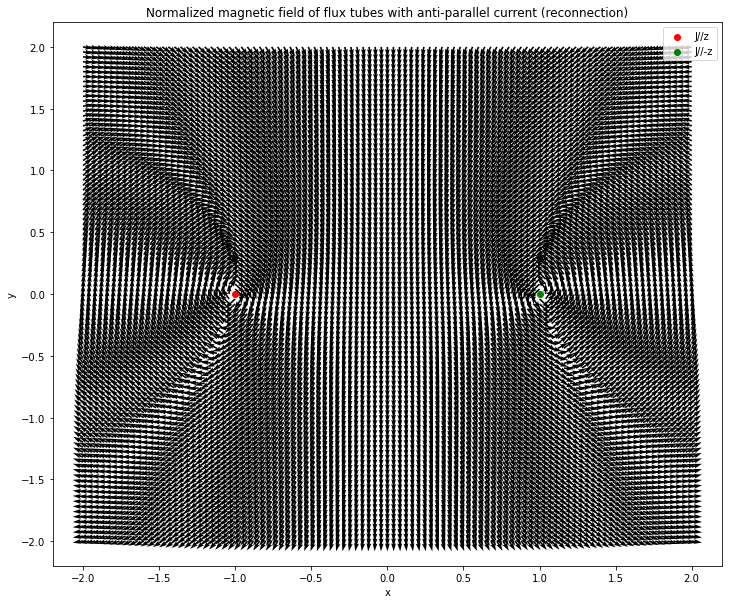

In [8]:
if showFields:
    EOM.showFields()

In [9]:
#xarr,yarr,pxarr,pyarr,B,minusArray,plusArray = integrateHamiltonian(x0,y0,p0x,p0y,t0,dt,N)

In [10]:
#plotTrajectories(xarr,yarr,pxarr,pyarr,B,minusArray,plusArray,EOM.J)